## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "05-Matplotlib_Homework_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "05-Matplotlib_Homework_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

# Display the data table for preview
merge_df.head()
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice.
print(merge_df.count())


num_mice = merge_df["Mouse ID"].nunique()
num_mice

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice in the clean DataFrame.
print(clean_df.count())

clean_num_mice = clean_df["Mouse ID"].nunique()
clean_num_mice

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64


248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_df.groupby(["Drug Regimen"])
regimen_group
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_variance = regimen_group["Tumor Volume (mm3)"].var()
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": regimen_mean, 
                           "Median":regimen_median, 
                           "Variance":regimen_variance, 
                           "Standard Deviation": regimen_std, 
                           "SEM": regimen_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

In [29]:
count_df = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
count_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

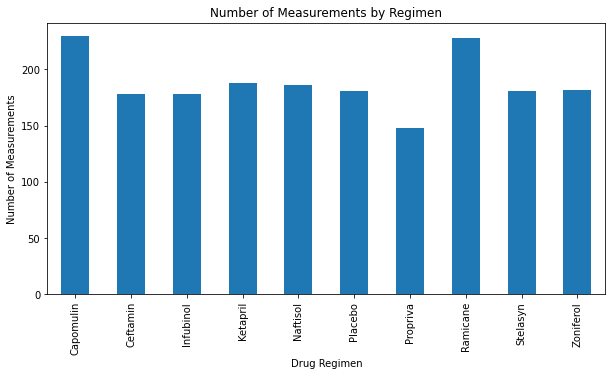

<Figure size 432x288 with 0 Axes>

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_df.plot(kind="bar", figsize=(10,5))

plt.title("Number of Measurements by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Measurements')

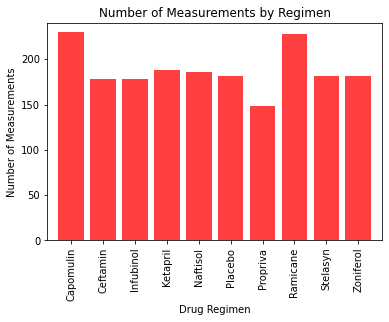

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

x_axis = np.arange(len(count_df))

plt.bar(x_axis, mice, color='red', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice)+10)

plt.title("Number of Measurements by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

In [51]:
gender_group = clean_df.groupby(["Mouse ID","Sex"])
gender_group

gender_df = pd.DataFrame(gender_group.size())

gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]

gender["Gender %"] = (100*(gender["Total Count"]/gender["Total Count"].sum()))

gender["Gender %"] = gender["Gender %"]

gender

,Total Count,Gender %
Sex,,
Female,123,49.596774
Male,125,50.403226


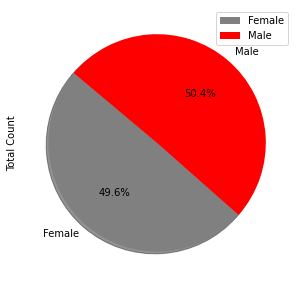

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['gray', 'red']
plot = gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, shadow = True, autopct="%1.1f%%")

(-1.1192168963081732,
 1.1079352522711863,
 -1.1167571903773796,
 1.1085810220189514)

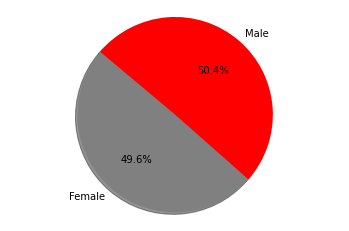

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
percent = [49.596774,50.403226]
colors = ['gray', 'red']
plt.pie(percent, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_volume = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_volume = final_volume.sort_values(["Timepoint"], ascending=True)
final_volume

final_volume_df = final_volume[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

final_volume_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(final_volume_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
merge_df.head()

,Drug Regimen_x,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y,Metastatic Sites
0,Ramicane,k403,0,45.0,Ramicane,Male,21,16,45.0,0
1,Infubinol,q132,0,45.0,Infubinol,Female,1,30,45.0,0
2,Capomulin,i738,0,45.0,Capomulin,Female,23,20,45.0,0
3,Ramicane,a520,0,45.0,Ramicane,Male,13,21,45.0,0
4,Ceftamin,p438,0,45.0,Ceftamin,Female,11,26,45.0,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels) 


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
